## HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [3]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [5]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [7]:
crash = crash[~np.isnan(crash.speeding)]
crash.isnull().any()

accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

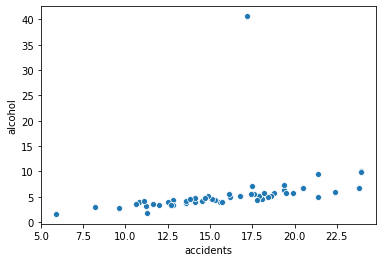

In [8]:
sns.scatterplot(x = 'accidents', y = 'alcohol', data = crash)

**40 is an outlier**

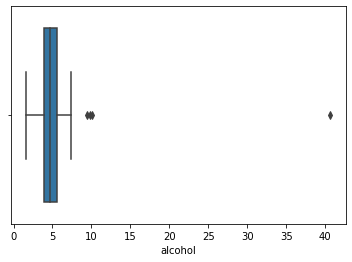

In [9]:
sns.boxplot(x = crash.alcohol)

**40 is an outlier**

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

**Before removal of the outlier row**

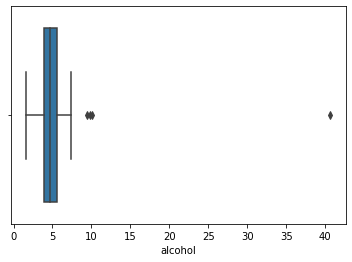

In [10]:
sns.boxplot(x = crash.alcohol)

**After removal of the outlier row**

In [11]:
crash = crash[crash.alcohol <= 15]
crash.shape

(50, 10)

## Question 5. Calculate the average speeding in usa and Northeast region using SQL

**Average speeding in USA**

In [12]:
sql = "select avg(speeding) from crash"
ps.sqldf(sql)

,avg(speeding)
0,5.01944


**Average speeding in Northeast region**

In [13]:
sql = "select region, avg(speeding) from crash where region = 'Northeast'"
ps.sqldf(sql)

,region,avg(speeding)
0,Northeast,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [14]:
sql = "select region, avg(alcohol) from crash group by region"
ps.sqldf(sql)

,region,avg(alcohol)
0,Midwest,4.996917
1,Northeast,3.980500
2,South,5.414647
3,West,4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [15]:
sql = "select division, count(*) as occurences, avg(speeding) as mean, min(speeding) as min, max(speeding) as max from crash group by division"
ps.sqldf(sql)

,division,occurences,mean,min,max
0,East North Central,5,4.106600,3.384,4.968
1,East South Central,4,4.533250,2.640,7.332
2,Middle Atlantic,2,5.446000,1.792,9.100
3,Mountain,8,5.812250,3.496,8.346
4,New England,6,4.084333,1.886,5.738
5,Pacific,5,5.949400,4.200,9.450
6,South Atlantic,9,5.030444,2.006,9.082
7,West North Central,7,4.293429,1.937,6.923
8,West South Central,4,6.333750,4.032,7.760


## Question 8. Answer Question 7 but use Pandas functions

In [16]:
crash.groupby(['division']).speeding.describe()

,count,mean,std,min,25%,50%,75%,max
division,,,,,,,,
East North Central,5.0,4.106600,0.665705,3.384,3.62500,3.9480,4.60800,4.968
East South Central,4.0,4.533250,1.985597,2.640,3.70950,4.0805,4.90425,7.332
Middle Atlantic,2.0,5.446000,5.167536,1.792,3.61900,5.4460,7.27300,9.100
Mountain,8.0,5.812250,1.524017,3.496,4.98875,5.4735,6.70950,8.346
New England,6.0,4.084333,1.299621,1.886,3.84550,4.0700,4.74600,5.738
Pacific,5.0,5.949400,2.382195,4.200,4.22400,4.4520,7.42100,9.450
South Atlantic,9.0,5.030444,2.546183,2.006,2.96400,4.2500,6.55200,9.082
West North Central,7.0,4.293429,2.005279,1.937,2.43850,4.8060,5.75550,6.923
West South Central,4.0,6.333750,1.637184,4.032,5.78400,6.7715,7.32125,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

**Standard deviation for the accidents for each region**

In [17]:
crash.groupby(['region']).accidents.std()

region
Midwest      3.588988
Northeast    3.077453
South        4.537037
West         3.325118
Name: accidents, dtype: float64

**Skew for the accidents for each region**

In [18]:
crash.groupby(['region']).accidents.skew()

region
Midwest      0.950845
Northeast    0.777587
South       -1.125839
West         0.064819
Name: accidents, dtype: float64

**Kurtosis for the accidents for each region**

In [19]:
crash.groupby(['region']).accidents.apply(pd.DataFrame.kurtosis)

region
Midwest      2.067092
Northeast    0.726713
South        1.860064
West        -1.048692
Name: accidents, dtype: float64

**Standard deviation for the speeding for each region**

In [20]:
crash.groupby(['region']).speeding.std()

region
Midwest      1.537451
Northeast    2.327773
South        2.220711
West         1.803138
Name: speeding, dtype: float64

**Skew for the speeding for each region**

In [21]:
crash.groupby(['region']).speeding.skew()

region
Midwest      0.121197
Northeast    1.051666
South        0.172035
West         0.697441
Name: speeding, dtype: float64

**Kurtosis for the speeding for each region**

In [22]:
crash.groupby(['region']).speeding.apply(pd.DataFrame.kurtosis)

region
Midwest     -0.737061
Northeast    1.763520
South       -1.327699
West        -0.465455
Name: speeding, dtype: float64

**Standard deviation for the alcohol for each region**

In [23]:
crash.groupby(['region']).alcohol.std()

region
Midwest      1.824432
Northeast    0.872950
South        1.773576
West         1.910356
Name: alcohol, dtype: float64

**Skew for the alcohol for each region**

In [24]:
crash.groupby(['region']).alcohol.skew()

region
Midwest      2.093467
Northeast    0.764250
South        0.330988
West         1.159752
Name: alcohol, dtype: float64

**Kurtosis for the alcohol for each region**

In [25]:
crash.groupby(['region']).alcohol.apply(pd.DataFrame.kurtosis)

region
Midwest      5.597372
Northeast    0.890501
South        2.125568
West         2.219220
Name: alcohol, dtype: float64

## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

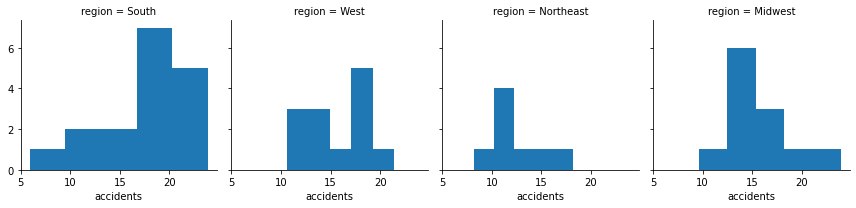

In [26]:
g = sns.FacetGrid(crash, col = 'region')
g = g.map(plt.hist, 'accidents', bins = 5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

* The Midwest, Northeast, and West regions has a positive skew, therefore the states in those regions records bigger amounts of accidents. 
* The South region has a negative skew, there the states in this regions records lower amounts of accidents.
* The Midwest, Northeast, and South regions has a positive kurotsis, therefore there are more accidents outliers recorded within the states in those region.
* The West region has a negative kurotsis,  therefore there are less accidents outliers within the states in this region.

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [27]:
crash.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


**Alcohol will affect accidents the most**

### Now Load a different dataset (MPG dataset number 3)

In [28]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [29]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [30]:
mpg.mpg = mpg.mpg.fillna(mpg.mpg.mean())
mpg.horsepower = mpg.horsepower.fillna(mpg.horsepower.mean())
mpg.weight = mpg.weight.fillna(mpg.weight.mean())
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool